linear fit: y=2.4167940151086604x + -0.7281813626011631
(2.416793731034253, 2.416794299183068)
Pearson's r = 0.9999085380306848
SSE = 0.0146190684372317
R-square = 0.9998170844266614
CI_half_width = 2.8407440755273683e-07


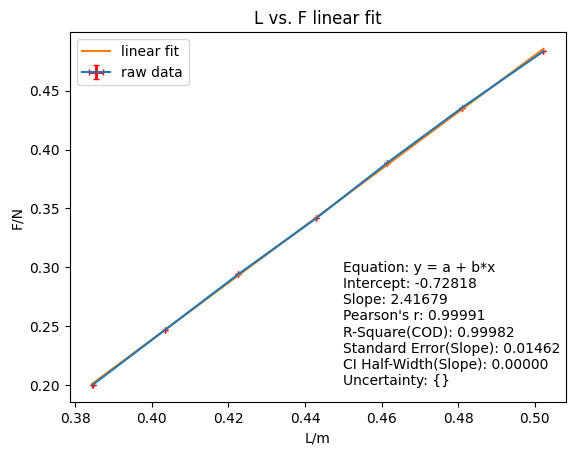

In [11]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
import statsmodels.api as sm
from scipy import stats

config={
    "text_x": 0.45,
    "text_y": 0.2,
    "title": "L vs. F linear fit",
    "label_x": "L/m",
    "label_y":"F/N"
}

def linear_fit(x,y,x_err,y_err):
    # error bar
    plt.errorbar(x,y,y_err,x_err,fmt="",ecolor="r",elinewidth=2,capsize=2)
    
    # lieanr fit
    x_train=np.array(x)
    y_train=np.array(y)
    x_err=np.array(x_err)
    y_err=np.array(y_err)

    # 权重矩阵，将误差的倒数平方作为权重
    weights = 1 / (x_err**2)

    # 执行线性回归拟合
    slope, intercept, r_value, p_value, std_err = stats.linregress(x_train, y_train)
    print(f"linear fit: y={slope}x + {intercept}");

    # 计算斜率的标准误差
    slope_stderr = std_err / np.sqrt(np.sum(weights))

    # 计算置信区间
    n = len(x)  # 样本数量
    dof = n - 2  # 自由度
    t_value = stats.t.ppf(0.975, dof)  # t分布上分位点，置信水平为95%
    confidence_interval = (slope - slope_stderr * t_value, slope + slope_stderr * t_value)
    print(confidence_interval)


    # plot regression line
    x_fit=np.linspace(x[0],x[-1],10000)
    y_fit=slope*x_fit+intercept
    plt.plot(x_fit,y_fit)

    # basic plot set
    plt.title(config["title"])
    plt.xlabel(config["label_x"])
    plt.ylabel(config["label_y"])
    plt.legend(["linear fit","raw data"])

    # statistics 
    y_pred=x_train*slope+intercept

    pearson_r=r_value
    sse=std_err
    r_squared=r_value**2
    ci_half_width=(confidence_interval[1]-confidence_interval[0])/2

    print(f"Pearson's r = {pearson_r}")
    print(f"SSE = {sse}")
    print(f"R-square = {r_squared}")
    print(f"CI_half_width = {ci_half_width}")

    # statistics plot
    text_str="Equation: y = a + b*x\n"
    text_str+="Intercept: {0:.5f}\n".format(intercept)
    text_str+="Slope: {0:.5f}\n".format(slope)
    text_str+="Pearson's r: {0:.5f}\n".format(pearson_r)
    text_str+="R-Square(COD): {0:.5f}\n".format(r_squared)
    text_str+="Standard Error(Slope): {0:.5f}\n".format(sse)
    text_str+="CI Half-Width(Slope): {0:.5f}\n".format(ci_half_width)
    text_str+="Uncertainty: {}"

    plt.text(config["text_x"],config["text_y"],text_str)


    plt.show()


L=[0.38450,0.40350,0.42250,0.44290,0.46150,0.48100,0.50220]
F=[0.2,0.2469,0.2939,0.3416,0.3888,0.4356,0.4834]
L_err=[0.00002,0.00002,0.00002,0.00002,0.00002,0.00002,0.00002]
F_err=[0.00001,0.00001,0.00001,0.00001,0.00001,0.00001,0.00001]

linear_fit(L,F,L_err,F_err)

In [ ]:
import numpy as np
from scipy import stats

# 输入数据
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 3, 4, 5, 6])
x_error = np.array([0.1, 0.2, 0.3, 0.4, 0.5])
y_error = np.array([0.2, 0.3, 0.4, 0.5, 0.6])

# 权重矩阵，将误差的倒数平方作为权重
weights = 1 / (x_error**2)

# 执行线性回归拟合
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y, weights=weights)

# 计算斜率的标准误差
slope_stderr = std_err / np.sqrt(np.sum(weights))

# 计算置信区间
n = len(x)  # 样本数量
dof = n - 2  # 自由度
t_value = stats.t.ppf(0.975, dof)  # t分布上分位点，置信水平为95%
confidence_interval = (slope - slope_stderr * t_value, slope + slope_stderr * t_value)

# 打印结果
print("斜率：", slope)
print("斜率的标准误差：", slope_stderr)
print("置信区间：", confidence_interval)
